In [28]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

!pip install opencv-python
import cv2
import math

(679, 1024)


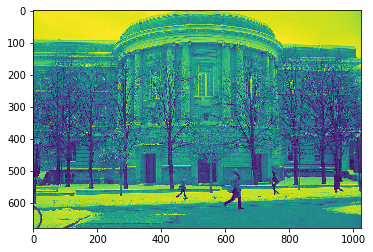

In [177]:
img = cv2.imread("Q4/I1.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
plt.imshow(img)

Find eigenvalue for each pixel

In [101]:
def get_gaussian(size, sigma):
    """
    returns a
    2D Gaussian matrix for input size and scale
    size: kernel size
    sigma: Gaussian standard deviation
    """

    const = 1/(2 * np.pi * (sigma ** 2))
    gauss_matrix = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            gauss_matrix[i,j] = const * np.exp(-0.5 * ((i-size//2)**2 + (j-size//2)**2)/ (sigma**2))
    gauss_matrix = gauss_matrix / np.sum(gauss_matrix)
    
    return gauss_matrix

In [164]:
grad_x = cv2.Sobel(img, cv2.CV_64F,1,0,ksize = 5)
grad_y = cv2.Sobel(img, cv2.CV_64F,0,1,ksize = 5)

m,n = img.shape
M = np.zeros((m,n,2,2))
eigen_val = np.zeros((m,n,2))

window = 3
sigma = 100
gaussian = get_gaussian(2*window+1, sigma)

l1 = []
l2 = []
for i in range(m-window):
    for j in range(n-window):
        for k in range(-window,window+1):
            for p in range(-window, window+1):
                M[i][j] += gaussian[k][p] * np.array([[grad_x[i+k][j+p] **2, grad_x[i+k][j+p] * grad_y[i+k][j+p]],
                 [grad_x[i+k][j+p] * grad_y[i+k][j+p],grad_y[i+k][j+p] **2 ]])
        eigen_val[i][j] = np.array(LA.eig(M[i][j])[0])
        l1.append(LA.eig(M[i][j])[0][0])
        l2.append(LA.eig(M[i][j])[0][1])

plt.scatter(l1,l2)
plt.xlabel("eigenvalue l1")
plt.ylabel("eigenvalue l2")
plt.show()

KeyboardInterrupt: 

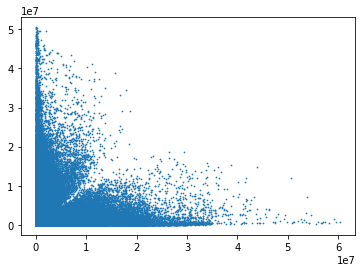

In [179]:
Ix = cv2.Sobel(img, cv2.CV_64F,1,0,ksize = 5)
Iy = cv2.Sobel(img, cv2.CV_64F,0,1,ksize = 5)

m,n = img.shape
M = np.zeros((m,n,2,2))
sigma = 500
M[:,:,0,0] = cv2.GaussianBlur(Ix*Ix, (7,7), sigma)
M[:,:,0,1] = cv2.GaussianBlur(Ix*Iy, (7,7), sigma)
M[:,:,1,0] = cv2.GaussianBlur(Ix*Iy, (7,7), sigma)
M[:,:,1,1] = cv2.GaussianBlur(Iy*Iy, (7,7), sigma)

eig_value, _ = np.linalg.eig(M)

l1 = eig_value[:,:,0]
l2 = eig_value[:,:,1]

plt.scatter(l1,l2, s=0.5)
plt.show()





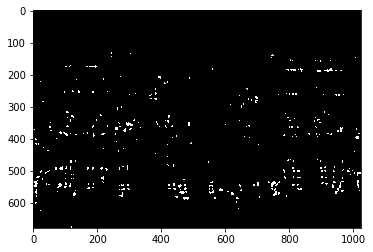

In [180]:
thres = 0.3 * 1e7
img_eig = np.zeros((m,n))
for i in range(m):
    for j in range(n):  
        if l1[i][j] > thres and l2[i][j] > thres:
            img_eig[i][j] = 255
plt.imshow(img_eig, cmap="gray")


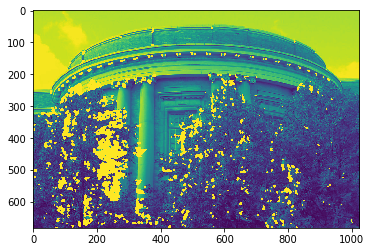

In [161]:
thres = 0.3 * 1e7
for i in range(m-1):
    for j in range(n-1):  
        if l1[i][j] > thres and l2[i][j] > thres:
            img[i][j],img[i+1][j],img[i][j+1],img[i+1][j+1]  = 255,255,255,255
            
plt.imshow(img)

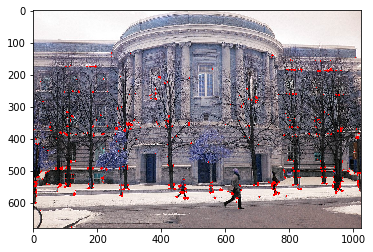

In [181]:
img2 = cv2.imread("Q4/I1.jpeg")
p,q = img2.shape[0], img.shape[1]
a = [255,0,0]
thres = 0.3 * 1e7
for i in range(p-1):
    for j in range(q-1):  
        if l1[i][j] > thres and l2[i][j] > thres:
            img2[i][j]  = a
plt.imshow(img2)

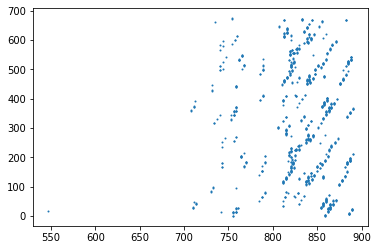

In [128]:

R = []
for i in range(len(l1)):
    R.append(l1[i]* l2[i] - 0.08*(l1[i] + l2[i])**2)
R_sort = sorted(R, reverse=True)

id = []
x = []
y = []

for j in range(1000):
    temp = R.index(R_sort[j])
    id.append(temp)
    x.append(temp // (m-window))
    y.append(temp - temp // (m-window) * (m-window))

plt.scatter(x,y,s=1)

In [131]:
# img = cv2.imread("Q4/I1.jpeg")
# print(img.shape)
# for i in range(len(x)):
#     for a in range(int(x[i]), int(x[i]) +10):
#         for b in range(int(y[i]), int(y[i]) +10):
#             if a < 679 and b < 1024:
#                 img[a][b] = 255
# plt.imshow(img)

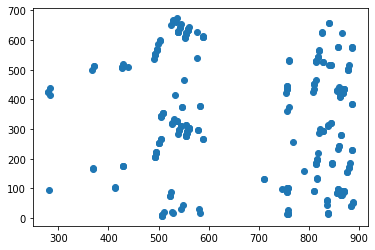

In [94]:
chosen = []
thres = 2000
for r in range(len(l1)):
    if l1[r] > thres and l2[r] > thres:
        chosen.append(r)

x = []
y = []

for j in chosen:
    x.append(j // (m-window))
    y.append(j - j // (m-window) * (m-window))

plt.scatter(x,y)
    

In [70]:
a = np.random.rand(3,4,2,2)
print(a[1][1].shape)
b= np.array([[2,3],[4,5]])
print(b)
print(b.shape)

for i in range(-1,1):
    print(i)

a = [2,4,3]
b = sorted(a, reverse=True)
print(a)
print(b)

(2, 2)
[[2 3]
 [4 5]]
(2, 2)
-1
0
[2, 4, 3]
[4, 3, 2]
